# 1.预处理

In [102]:
#导入
import pandas as pd
import numpy as np
import plotly as py
ted = pd.read_csv("ted_main.csv",encoding='gbk')
ted.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292


In [103]:
#查看数据集的列
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [104]:
#这是日期？什么鬼
a=ted['film_date'].unique()

In [105]:
#时间处理（参考https://blog.csdn.net/qq_36330643/article/details/78473140）
#还有一种办法就是用excel打开日期栏格式改一下，这里还是用科学的方法~

import datetime

ted['film_date'] = ted['film_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
ted['published_date'] = ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))

In [106]:
ted.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,25-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520


In [107]:
# 检查空值
ted.isnull().any()

comments              False
description           False
duration              False
event                 False
film_date             False
languages             False
main_speaker          False
name                  False
num_speaker           False
published_date        False
ratings               False
related_talks         False
speaker_occupation     True
tags                  False
title                 False
url                   False
views                 False
dtype: bool

In [108]:
# 查看一下speaker_occupation缺失值的具体情况
ted[ted['speaker_occupation'].isnull()]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1113,145,"After a crisis, how can we tell if water is sa...",217,TEDGlobal 2011,14-07-2011,38,Sonaar Luthra,Sonaar Luthra: Meet the Water Canary,1,17-01-2012,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TED Fellows', 'design', 'global development'...",Meet the Water Canary,https://www.ted.com/talks/sonaar_luthra_meet_t...,353749
1192,122,"The Pirate Party fights for transparency, anon...",1097,TEDxObserver,11-03-2012,10,Rick Falkvinge,Rick Falkvinge: I am a pirate,1,01-04-2012,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'TEDx', 'global issues', 'politic...",I am a pirate,https://www.ted.com/talks/rick_falkvinge_i_am_...,181010
1220,257,"As you surf the Web, information is being coll...",399,TED2012,29-02-2012,32,Gary Kovacs,Gary Kovacs: Tracking our online trackers,1,03-05-2012,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'advertising', 'business', 'priva...",Tracking our online trackers,https://www.ted.com/talks/gary_kovacs_tracking...,2098639
1656,140,"In this lovely talk, TED Fellow Ryan Holladay ...",389,TED@BCG San Francisco,30-10-2013,33,Ryan Holladay,Ryan Holladay: To hear this music you have to ...,1,11-01-2014,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'entertainment', 'music', 'tec...",To hear this music you have to be there. Liter...,https://www.ted.com/talks/ryan_holladay_to_hea...,1284510
1911,48,What do you do with an outdated encyclopedia i...,366,TEDYouth 2014,04-11-2014,34,Brian Dettmer,Brian Dettmer: Old books reborn as art,1,07-02-2015,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TEDYouth', 'art', 'books', 'creativity']",Old books reborn as art,https://www.ted.com/talks/brian_dettmer_old_bo...,1159937
1949,70,Photographer Boniface Mwangi wanted to protest...,440,TEDGlobal 2014,20-10-2014,33,Boniface Mwangi,Boniface Mwangi: The day I stood up alone,1,02-04-2015,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'activism', 'art', 'corruption...",The day I stood up alone,https://www.ted.com/talks/boniface_mwangi_boni...,1342431


主讲人职业中有6行存在空值，其他栏不存在空值。目测对之后分析的影响不大。

In [109]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null object
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null object
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(5), object(12)
memory usage: 338.8+ KB


# 2.数据分析

In [110]:
# 各个column内容的描述性统计
ted.describe()

,comments,duration,languages,num_speaker,views
count,2550.000000,2550.000000,2550.000000,2550.000000,2.550000e+03
mean,191.562353,826.510196,27.326275,1.028235,1.698297e+06
std,282.315223,374.009138,9.563452,0.207705,2.498479e+06
min,2.000000,135.000000,0.000000,1.000000,5.044300e+04
25%,63.000000,577.000000,23.000000,1.000000,7.557928e+05
50%,118.000000,848.000000,28.000000,1.000000,1.124524e+06
75%,221.750000,1046.750000,33.000000,1.000000,1.700760e+06
max,6404.000000,5256.000000,72.000000,5.000000,4.722711e+07


特地百度了下，观看数平均数：1.698297e+06=1698297，约170w，中位数112w；

评论均值有191w，，中位数有118w。

由此可以看出，数据量还是比较大的有一定可信度，但是观看数和评论数存在一定的差异，我们来探索一下他们的相关关系~

## 1：浏览量和评论数的关系？

In [111]:
ted[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


根据相关系数矩阵我们可以看出二者的皮尔逊相关系数为0.53，具有显著相关性。

In [112]:
#试试画个相关关系图，参考：https://plot.ly/python/line-and-scatter/
a =ted['views']
a.head(3)

0    47227110
1     3200520
2     1636292
Name: views, dtype: int64

In [113]:
import plotly.express as px
fig = px.scatter(x=ted['views'], y=ted['comments'])
fig.show()

从图中可以看出，除了个别样本点外，二者大概是存在正相关性的

那么看看和时长有没有关系？在短视频爆发的时代，人们会不会因为没耐心不看视频呢？

In [114]:
ted['duration'] = ted['duration']/60
ted['duration'].describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

In [115]:
ted[['views', 'duration']].corr()

,views,duration
views,1.00000,0.04874
duration,0.04874,1.00000


根据相关系数矩阵我们可以看出二者的皮尔逊相关系数为0.04，基本无关。

# 2.浏览量和评论数TOP10视频是什么？

In [116]:
#浏览量top10
views_ted = ted[['main_speaker', 'title','published_date', 'views','comments','tags','speaker_occupation','num_speaker']].sort_values(by = 'views', ascending = False)
views_ted.head(10)

,main_speaker,title,published_date,views,comments,tags,speaker_occupation,num_speaker
0,Ken Robinson,Do schools kill creativity?,27-06-2006,47227110,4553,"['children', 'creativity', 'culture', 'dance',...",Author/educator,1
1346,Amy Cuddy,Your body language may shape who you are,01-10-2012,43155405,2290,"['body language', 'brain', 'business', 'psycho...",Social psychologist,1
677,Simon Sinek,How great leaders inspire action,04-05-2010,34309432,1930,"['TEDx', 'business', 'entrepreneur', 'leadersh...",Leadership expert,1
837,Brené Brown,The power of vulnerability,23-12-2010,31168150,1927,"['TEDx', 'communication', 'culture', 'depressi...",Vulnerability researcher,1
452,Mary Roach,10 things you didn't know about orgasm,20-05-2009,22270883,354,"['books', 'culture', 'history', 'humor', 'scie...",Writer,1
1776,Julian Treasure,How to speak so that people want to listen,27-06-2014,21594632,297,"['culture', 'sound', 'speech']",Sound consultant,1
201,Jill Bolte Taylor,My stroke of insight,12-03-2008,21190883,2877,"['biology', 'brain', 'consciousness', 'global ...",Neuroanatomist,1
5,Tony Robbins,Why we do what we do,28-06-2006,20685401,672,"['business', 'culture', 'entertainment', 'goal...",Life coach; expert in leadership psychology,1
2114,James Veitch,This is what happens when you reply to spam email,09-01-2016,20475972,150,"['comedy', 'communication', 'curiosity', 'humo...",Comedian and writer,1
1416,Cameron Russell,"Looks aren't everything. Believe me, I'm a model.",17-01-2013,19787465,846,"['TEDx', 'beauty', 'culture', 'fashion', 'phot...",Model,1


由上表标签粗略可以看出，浏览量最多的是2006-6-27，由Ken Robinson演讲的“Do schools kill creativity?”关于教育和孩子的主题，有4700w浏览量，有4553评论。

人们比较感兴趣的主题是教育、人文、职场、自我提升等几个领域的，接下来我们来验证一下

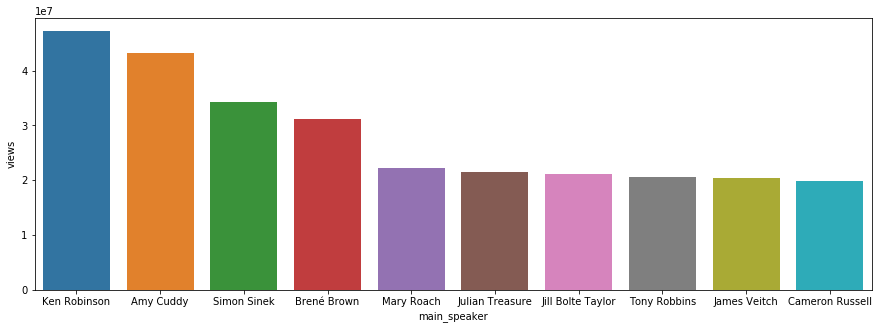

In [117]:
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))

sns.barplot(x='main_speaker', y='views', data=views_ted.head(10))
plt.show()

In [118]:
import ast
ted['tags'] = ted['tags'].apply(lambda x: ast.literal_eval(x))
ted['tags'].head()

0    [children, creativity, culture, dance, educati...
1    [alternative energy, cars, climate change, cul...
2    [computers, entertainment, interface design, m...
3    [MacArthur grant, activism, business, cities, ...
4    [Africa, Asia, Google, demo, economics, global...
Name: tags, dtype: object

In [119]:
# 将每个视频的标签拆开
s = ted.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'title'
s.head()

0      children
0    creativity
0       culture
0         dance
0     education
Name: title, dtype: object

In [120]:
# 将拆分好的标签加回原数据集
theme_df = ted.drop('title', axis = 1).join(s)
theme_df.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,url,views,title
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.4,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"[children, creativity, culture, dance, educati...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,children
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.4,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"[children, creativity, culture, dance, educati...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,creativity


In [121]:
#浏览量top10
views_ted = ted[['main_speaker', 'title','published_date', 'views','comments','tags','speaker_occupation','num_speaker']].sort_values(by = 'comments', ascending = False)
views_ted.head(10)

,main_speaker,title,published_date,views,comments,tags,speaker_occupation,num_speaker
96,Richard Dawkins,Militant atheism,16-04-2007,4374792,6404,"[God, atheism, culture, religion, science]",Evolutionary biologist,1
0,Ken Robinson,Do schools kill creativity?,27-06-2006,47227110,4553,"[children, creativity, culture, dance, educati...",Author/educator,1
644,Sam Harris,Science can answer moral questions,22-03-2010,3433437,3356,"[culture, evolutionary psychology, global issu...","Neuroscientist, philosopher",1
201,Jill Bolte Taylor,My stroke of insight,12-03-2008,21190883,2877,"[biology, brain, consciousness, global issues,...",Neuroanatomist,1
1787,David Chalmers,How do you explain consciousness?,14-07-2014,2162764,2673,"[brain, consciousness, neuroscience, philosophy]",Philosopher,1
954,Janet Echelman,Taking imagination seriously,08-06-2011,1832930,2492,"[art, cities, culture, data, design, technolog...",Artist,1
840,Lesley Hazleton,On reading the Koran,04-01-2011,1847256,2374,"[TEDx, culture, global issues, journalism, rel...","Writer, psychologist",1
1346,Amy Cuddy,Your body language may shape who you are,01-10-2012,43155405,2290,"[body language, brain, business, psychology, s...",Social psychologist,1
661,Michael Specter,The danger of science denial,12-04-2010,1838628,2272,"[global issues, medicine, religion, science, w...",Writer,1
677,Simon Sinek,How great leaders inspire action,04-05-2010,34309432,1930,"[TEDx, business, entrepreneur, leadership, suc...",Leadership expert,1


# 3：看看哪些主题演讲比较多？

In [122]:
pop_themes=theme_df['title'].value_counts()
pop_themes.head(10)

technology       727
science          567
global issues    501
culture          486
TEDx             450
design           418
business         348
entertainment    299
health           236
innovation       229
Name: title, dtype: int64

In [123]:
# 看看那些主题比较受关注（评论比较多）
import plotly.graph_objects as go

import numpy as np
x=theme_df['comments']
y = theme_df['title']
# Use `y` argument instead of `x` for horizontal histogram

fig = go.Figure(data=[go.Histogram(y=y)])
fig.show()

可以看出，TED演讲谈论最多的领域是科技、科学、全球问题、文化、TEDx活动经验等问题。跟我刚刚凭直观看表的猜测有一定的误差，因此我们还是以数据来说话。其中科技最多高达723个

# 4：主讲人都来自什么职业？

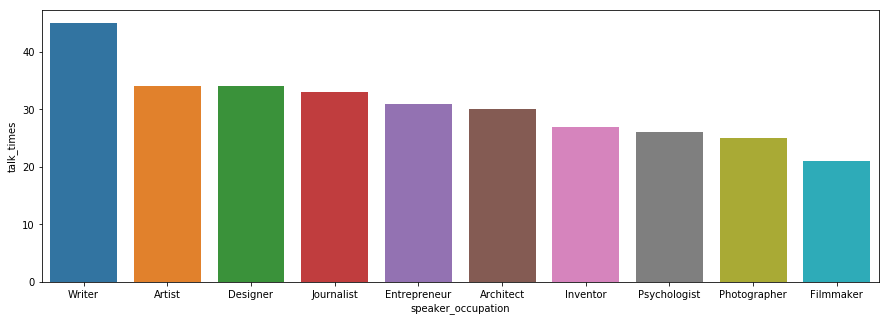

In [124]:
occupation_df = ted.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['speaker_occupation', 'talk_times']
occupation_df = occupation_df.sort_values('talk_times', ascending = False)

plt.figure(figsize=(15,5))
sns.barplot(x='speaker_occupation', y='talk_times', data=occupation_df.head(10))
plt.show()

# 5.每个时间段的评论和浏览量？

In [125]:
# 月份和星期的顺序
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

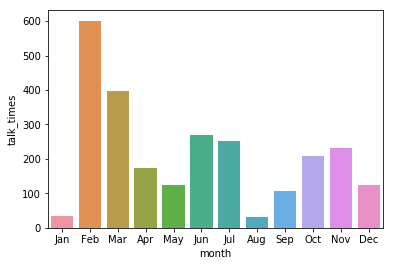

In [126]:
# 加一列月份
ted['month'] = ted['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])
month_df = pd.DataFrame(ted['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talk_times']

sns.barplot(x = 'month', y = 'talk_times', data = month_df, order = month_order)


有上图可以看出TED演讲的产出最多是二三月分，此前是六七月份，再而是十十一月份，有季节特点，春季产出最多，其次是暑寒假，符合人们的观看习惯。

In [127]:
# 添加年份列
ted['years'] = ted['published_date'].apply(lambda x: x.split('-')[2])
year_df = pd.DataFrame(ted['years'].value_counts().reset_index())
year_df.columns = ['years', 'times']


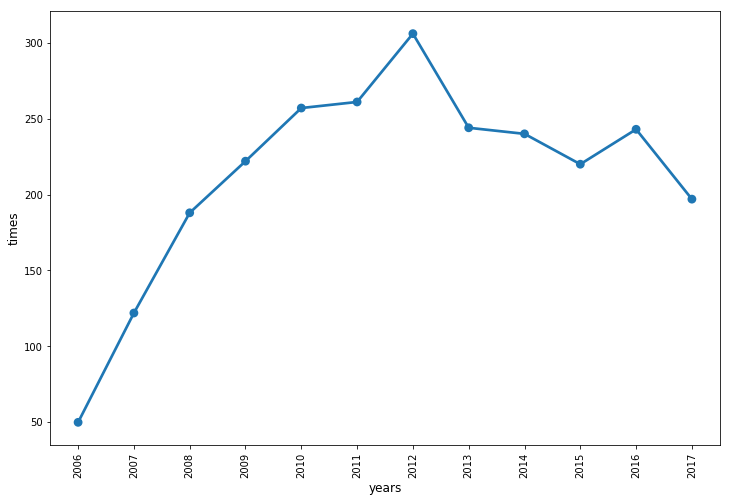

In [128]:
import seaborn as sns  
import matplotlib.pyplot as plt  


ted['years'] = ted['published_date'].apply(lambda x: x.split('-')[2])
year_df = pd.DataFrame(ted['years'].value_counts().reset_index())
year_df.columns = ['years', 'times']

plt.figure(figsize=(12,8))

sns.pointplot(year_df.years.values, year_df.times.values, alpha=0.8)

plt.ylabel('times', fontsize=12)

plt.xlabel('years', fontsize=12)

plt.xticks(rotation='vertical') 

plt.show()



可以看出：

TED演讲的视频数量逐年上升；2008到2010年，视频数量急剧上升；2010年后稳定在250个左右；2012年达到顶峰又开始下降,又稳定在250个左右



# 6.时间滑块处理

In [129]:
import pandas as pd  
outputpath='C:/Users/LIN/1sophia_try/tedtalk/yearsx.xlsx'

ted.to_excel(outputpath)

In [130]:
years2 = pd.read_excel("years2.xlsx",encoding='utf-8')
years2.head(3)

,years,views,comments
0,2006,47227110,4553
1,2006,3200520,265
2,2006,1636292,124


In [131]:
years2.columns

Index(['years', 'views', 'comments'], dtype='object')

In [132]:
#分类汇总Python
years_sum = years2.groupby('years')['views','comments'].sum() 
years_sum
outputpath='C:/Users/LIN/1sophia_try/tedtalk/years3.xlsx'

ted.to_excel(outputpath)

In [133]:
df_sum =years_sum.T
df_sum

years,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
views,206548331,176455861,260270993,342059615,402694421,400499694,489662029,545291823,445515954,420587281,414139074,226933502
comments,18171,25080,27477,44104,80955,64526,64058,70434,38086,25967,19758,9868


In [134]:
df_sum.columns

Int64Index([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017],
           dtype='int64', name='years')

In [135]:
[pd.to_datetime('01/01/{y}'.format(y=x), format="%m/%d/%Y") for x in df_sum.columns.values]  #年份做迭代处理

[Timestamp('2006-01-01 00:00:00'),
 Timestamp('2007-01-01 00:00:00'),
 Timestamp('2008-01-01 00:00:00'),
 Timestamp('2009-01-01 00:00:00'),
 Timestamp('2010-01-01 00:00:00'),
 Timestamp('2011-01-01 00:00:00'),
 Timestamp('2012-01-01 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('2014-01-01 00:00:00'),
 Timestamp('2015-01-01 00:00:00'),
 Timestamp('2016-01-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00')]

In [136]:
df_sum.index

Index(['views', 'comments'], dtype='object')

In [137]:
df_sum.loc["views",:] 

years
2006    206548331
2007    176455861
2008    260270993
2009    342059615
2010    402694421
2011    400499694
2012    489662029
2013    545291823
2014    445515954
2015    420587281
2016    414139074
2017    226933502
Name: views, dtype: int64

In [138]:
# 增加标题title，利用Layout做排版

import plotly as py
import plotly.graph_objs as go

views = go.Scatter(
    x=[pd.to_datetime('01/01/{y}'.format(y=x), format="%m/%d/%Y") for x in df_sum.columns.values],
    y=df_sum.loc["views",:].values,  
    name = "views"
)

comments = go.Scatter(
    x=[pd.to_datetime('01/01/{y}'.format(y=x), format="%m/%d/%Y") for x in df_sum.columns.values],
    y=df_sum.loc["comments",:].values,
    name = "comments"
)

layout = dict(xaxis=dict(rangeselector=dict( buttons=list([
                                                dict(count=3,
                                                     label="3年",
                                                     step="year",
                                                     stepmode="backward"),
                                                dict(count=5,
                                                     label="5年",
                                                     step="year",
                                                     stepmode="backward"),
                                                dict(count=10,
                                                     label="10年",
                                                     step="year",
                                                     stepmode="backward"),
                                                dict(count=20,
                                                     label="20年",
                                                     step="year",
                                                     stepmode="backward"),
                                                dict(step="all")
                                            ])),
                         rangeslider=dict(bgcolor="#70EC57"),
                         title='年份'
                        ),
              yaxis=dict(title='视频观看及评论'),
              title="不同年份观看和评论对比"               
             )

abc = dict(data=[views,comments], layout=layout) 

py.offline.plot(abc, filename = "test.html")
#              ^^^这里可以只放数据data，也可以将数据data和排版layout结合，这是典型的面向对象

'test.html'

# 7.研究中：https://plot.ly/python/line-and-scatter/

In [142]:
from IPython.display import IFrame
IFrame(src= "https://dash-simple-apps.plotly.host/dash-linescatterplot/", width="100%",height="750px", frameBorder="0")

In [144]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
import os
from app import app

if 'DYNO' in os.environ:
    app_name = os.environ['DASH_APP_NAME']
else:
    app_name = 'dash-linescatterplot'

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/Wage%20Rigidity%20Dataset.csv')
df.dropna(inplace=True)
df['year'] = pd.DatetimeIndex(df['Date']).year

layout = html.Div([
    html.Div([html.H1("Employment Wage Rigidity")], style={"text-align": "center"}),
    html.Div(dcc.Graph(id="my-graph")),
    html.Div([dcc.RangeSlider(id='year-slider', min=1983, max=df['year'].max(),
                              marks={1983: '1983', 1990: '1990', 2000: '2000', 2003: '2003', 2005: '2005', 2008: '2008',
                                     2010: '2010', 2013: '2013', 2016: '2016'}, value=[2000, 2005])
              ], style={"margin": 20, "padding": 30})
], className="container")


@app.callback(
    dash.dependencies.Output('my-graph', 'figure'),
    [dash.dependencies.Input('year-slider', 'value')])
def update_figure(selected_year):
    pd.options.mode.chained_assignment = None  # default='SettingWithCopyWarning'
    dff = df[(df.year >= selected_year[0]) & (df.year <= selected_year[1])]
    dff['Date'] = pd.to_datetime(dff['Date']).dt.strftime('%y/%d')
    trace1 = go.Scatter(y=dff["Hourly workers"], x=dff["Date"], mode='lines+markers', marker={"size": 3.5},
                        name="Hourly")
    trace2 = go.Scatter(y=dff['Non-hourly workers'], x=dff["Date"], mode='markers', marker={"size": 3},
                        name="Non-Hourly")
    trace3 = go.Scatter(y=dff["High school"], x=dff["Date"], mode='lines', marker={"size": 2}, name="High school")
    trace4 = go.Scatter(y=dff["Construction"], x=dff["Date"], mode='lines+markers', marker={"size": 3.5},
                        name="Construction")
    trace5 = go.Scatter(y=dff["Finance"], x=dff["Date"], mode='lines', marker={"size": 2}, name="Finance")
    trace6 = go.Scatter(y=dff["Manufacturing"], x=dff["Date"], mode='markers', marker={"size": 3}, name="Manufacturing")
    data = [trace1, trace2, trace3, trace4, trace5, trace6]
    return {"data": data,
            "layout": go.Layout(title=f"Wage Rigidity for {'-'.join(str(i) for i in selected_year)}",
                                yaxis={"title": "% of Jobstayers With a Wage Change of Zero", "range": [0, 25],
                                       "tick0": 0, "dtick": 5}, xaxis={"title": "Year", "tickangle": 45}, )}



ModuleNotFoundError: No module named 'app'